# Problem Set 4 CS129.18

## Requirements


>Geospatial Analytics is a domain heavily used in corporate and business data science. It's used for demand-forecasting, real-estate prediction, population estimation, and optimal route planning..

Using the lessons on DBSCAN, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. What are the top 3 most common coffee places? ( 1pt )

2. What is the latitude variance and longitude variance, and explain why these variances are different. ( 3pts )

3. Explain what KMeans intertia is and how different it is from DBSCAN epsilon. ( 4pts )

4. Cluster the locations data with DBSCAN. ( 5pts )

5. Present an analysis of the data following the DBSCAN results. ( 7pts )
 - explain what the clusters mean
 - what does the # of clusters tell us
 - what is this information useful for





-----


Bonus 1 : What is your favorite coffee shop? (1pt)


Bonus 2 : Run everything on your own geospatial dataset, and answer the same questions listed above. (5pts)
Use this: https://developer.foursquare.com/docs/resources/categories
 
----

**Submit this file on Moodle on the submission link I will provide. This is due October 25 12nn.**

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import folium
from folium import plugins
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import foursquare

# Make the graphs a bit prettier, and bigger
# pd.set_option('display.mpl_style', 'default')
plt.style.use('ggplot')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

In [ ]:
# # This assigns the coffeeshops data to a dataframe object that maps to the "df" variable
# df = pd.read_csv("data/coffeeshops.csv")
# df = df.drop_duplicates()

In [2]:
# Construct the client object
client = foursquare.Foursquare(client_id='FSOIR5HJEIW1PGIMYR2V2FV2YEAQRYS3YSQZ4TY35DB3IWWL', 
                               client_secret='2PQKGGZTNHDSK3YB001AXAJOZYI0D5JSVPMCNXXZIKIUA5N4')

# Build the authorization url for your app
auth_uri = client.oauth.auth_url()

In [4]:
# init topics
# topics = ["mexican fast food", "mexican", "burrito", "mexican food", "tacos", "mexican restaurant"]
topics = ['school', 'institution', 'highschool', 'high school', 'university', 'college']
# topics = ['transportation', 'transpo', 'commute', 'commuting', 'jeep', 'jeepney', 'bus', 'tricycle']

# Categories:
# Elementary School, High School, Middle School, Nursery School, Preschool, 
# Private School, Religious School, University, General College & University, Community College
categoryIds = ['4f4533804b9074f6e4fb0105', '4bf58dd8d48988d13d941735', '4f4533814b9074f6e4fb0106', \
               '4f4533814b9074f6e4fb0107', '52e81612bcbc57f1066b7a45', '52e81612bcbc57f1066b7a46', \
               '52e81612bcbc57f1066b7a47', '4bf58dd8d48988d1ae941735', '4bf58dd8d48988d1a8941735', \
               '4bf58dd8d48988d1a2941735']

response = [client.venues.search(params={'query': topic, 
                                         'near': 'Manila, Philippines',
                                         'radius': 13000,
                                         'limit': 30, 
                                         'intent': "browse", 
                                         'categoryId': categoryId})
            for topic in topics for categoryId in categoryIds]

In [5]:
import pprint

print(f'\nresponse length = {len(response)}\n')
print(type(response))
pprint.pprint(response[0]['venues'][0])
# pprint.pprint(response[0]['venues'][29]['categories'][0]['name'])


response length = 60

<class 'list'>
{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_',
                          'suffix': '.png'},
                 'id': '4f4533804b9074f6e4fb0105',
                 'name': 'Elementary School',
                 'pluralName': 'Elementary Schools',
                 'primary': True,
                 'shortName': 'Elementary School'}],
 'hasPerk': False,
 'id': '51904869498e4ddbd9b476e8',
 'location': {'address': 'Teodora Alonzo St',
              'cc': 'PH',
              'city': 'Maynila',
              'country': 'Pilipinas',
              'formattedAddress': ['Teodora Alonzo St',
                                   'Maynila',
                                   'City of Manila',
                                   'Pilipinas'],
              'labeledLatLngs': [{'label': 'display',
                                  'lat': 14.60487142963653,
                                  'lng': 120.9785771231125}],
        

In [6]:
data_list = []
for x in range(len(response)):
    try:
        for i in range(len(response[x]["venues"])):
            poi_id =  response[x]["venues"][i]["id"]
            poi_category = response[x]['venues'][i]['categories'][0]['name']
            poi_name =  response[x]["venues"][i]["name"]
            poi_lat =  response[x]["venues"][i]["location"]["lat"]
            poi_lng =  response[x]["venues"][i]["location"]["lng"]
            data_list.append([poi_id, poi_category, poi_name, poi_lat, poi_lng])
    except KeyError:
        pass

df = pd.DataFrame(data_list, columns=["id", "category", 'name', "lat", "lng"])
df = df.drop_duplicates()
df["name"] = df['name'].str.lower()
df['category'] = df['category'].str.lower()

In [7]:
df.describe()

,lat,lng
count,414.000000,414.000000
mean,14.606980,121.013314
std,0.039616,0.035113
min,14.500399,120.938193
25%,14.581816,120.987155
50%,14.603783,121.000772
75%,14.631497,121.040327
max,14.709133,121.096880


In [8]:
df.sample(10)

,id,category,name,lat,lng
81,50aaf3bce4b0de093e4a3141,nursery school,nfwc (escoda nursery school),14.610190,121.011248
96,517219eee4b09fc932390af1,nursery school,st.liem dela paz nursery school,14.553131,120.993782
148,51d7f1a9498ee4694402a615,general college & university,graduate school office,14.585911,120.985221
8,51e8b048498eed039f2d1050,elementary school,richfield montessori school,14.603118,121.005043
539,5258d6df11d25c88dc872892,university,philippine normal university,14.604519,120.985125
28,50e93078e4b0a5a074cbf40c,elementary school,doña pilar c. gonzaga elementary school,14.589451,121.034146
607,51b9579e498ea30f61518696,high school,st. monique college of manila,14.595916,121.021415
625,5358611e498e311a8b06bfdf,private school,aula minor,14.564304,121.070882
123,4fadfa4de4b047f11cfc9b42,private school,cie british school,14.555418,121.019141
45,4de1b3db45dd180ae535ee08,general college & university,ellnwood christian school,14.574766,120.988105


## 1. What are the top 3 most common school categories? ( 1pt )
---

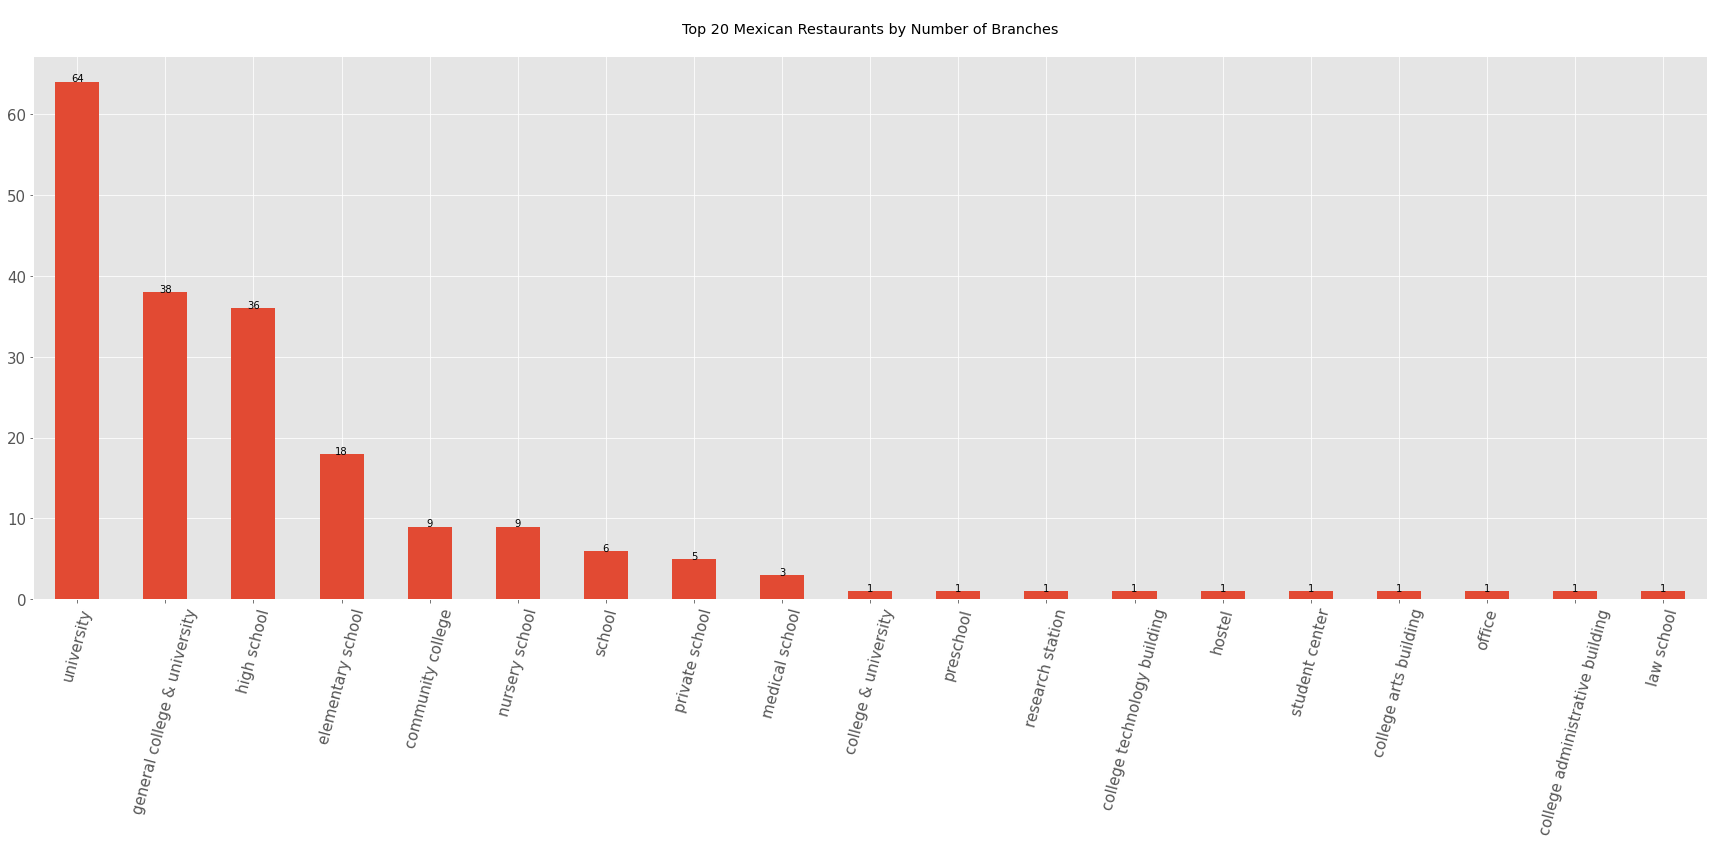

In [41]:
fig, ax = plt.subplots()
df['category'].value_counts().head(30).plot(ax=ax, kind='bar', \
                                        title ="\nTop 20 Mexican Restaurants by Number of Branches\n",figsize=(30,10), fontsize=15, rot=75)

values = df['category'].value_counts()

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, values[i], ha="center")

In [10]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
        popup = folium.Popup('name: ' + row["name"] + '\n' + 'category: ' + row["category"] + '\n' + str(row["lat"]) + " " + str(row["lng"]), parse_html=True),
    fill=True).add_to(basemap)
    
# basemap.save('fastfood.html')

basemap

## 2. What is the latitude variance and longitude variance, and explain why these variances are different. ( 3pts )
---

In [11]:
df.var()

lat    0.001569
lng    0.001233
dtype: float64

The difference between the variances of the longitude and latitude coordinates is influenced by the distribution of the data points across Metro Manila. From the data above, it can be inferred that the higher latitude variance is a result of majority of the data points being more spread out to the east and west as opposed to north and south.

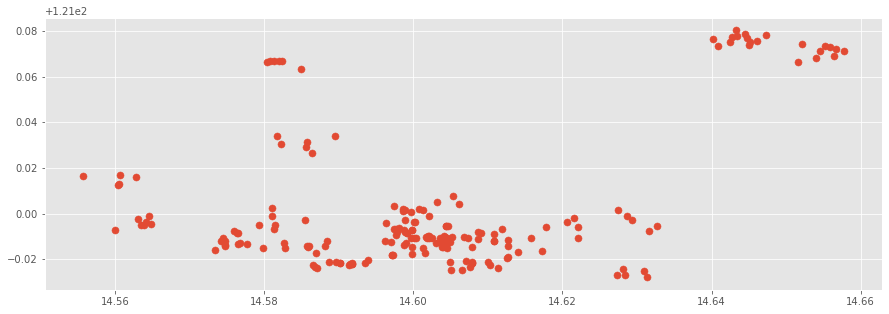

In [39]:
X = np.array(df[["lat", "lng"]].values.tolist())
plt.scatter(X[:, 0], X[:, 1], s=50)

In [38]:
# len(X)
type(X)

numpy.ndarray

In [36]:
var = 5

kmeans = KMeans(n_clusters=var)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

df["cluster"] = y_kmeans

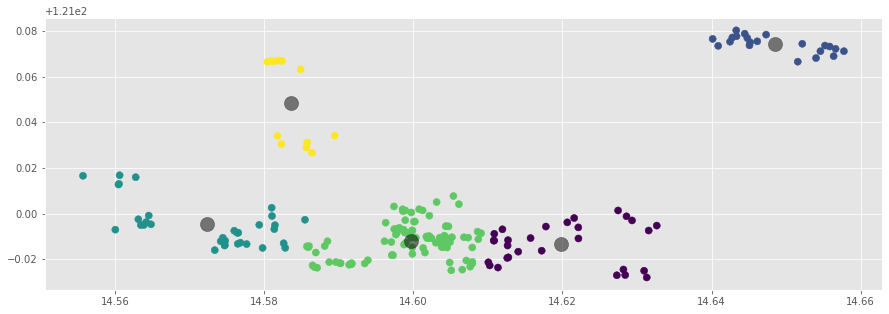

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [15]:
df.head()

,id,category,name,lat,lng,cluster
0,51904869498e4ddbd9b476e8,elementary school,antonio regidor elementary school,14.604871,120.978577,0
1,4f3a0139e4b0b5606e162aca,elementary school,a. mabini elementary school,14.601315,120.984946,0
2,4d5db6b61d69b1f7bbea1ed1,elementary school,gregorio del pilar elementary school,14.606561,120.975451,0
3,4f21d06ce4b047657702f451,elementary school,general maximino hizon elementary school,14.611348,120.976359,0
4,4f6be8dae4b0541c5ffae3c2,elementary school,justo lukban elementary school,14.581349,120.993197,0


In [16]:
palette = sns.color_palette("colorblind", var).as_hex()
palette

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc']

In [17]:
color_getter = lambda x: palette[int(x)]
df["color"] = df["cluster"].map(color_getter)
df.head()

,id,category,name,lat,lng,cluster,color
0,51904869498e4ddbd9b476e8,elementary school,antonio regidor elementary school,14.604871,120.978577,0,#0173b2
1,4f3a0139e4b0b5606e162aca,elementary school,a. mabini elementary school,14.601315,120.984946,0,#0173b2
2,4d5db6b61d69b1f7bbea1ed1,elementary school,gregorio del pilar elementary school,14.606561,120.975451,0,#0173b2
3,4f21d06ce4b047657702f451,elementary school,general maximino hizon elementary school,14.611348,120.976359,0,#0173b2
4,4f6be8dae4b0541c5ffae3c2,elementary school,justo lukban elementary school,14.581349,120.993197,0,#0173b2


In [18]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
        fill=True,
        color =row["color"],
#         popup = folium.Popup(row["name"], parse_html=True),
#         popup = folium.Popup(row["name"] + '\n' + str(row["lat"]) + " " + str(row["lng"]), parse_html=True),
            popup = folium.Popup('name: ' + row["name"] + '\n' + 'category: ' + row["category"] + '\n' + str(row["lat"]) + " " + str(row["lng"]), parse_html=True),
        fill_color=row["color"]).add_to(basemap)
    
# basemap.save('coffeeshops.html')

basemap

In [19]:
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

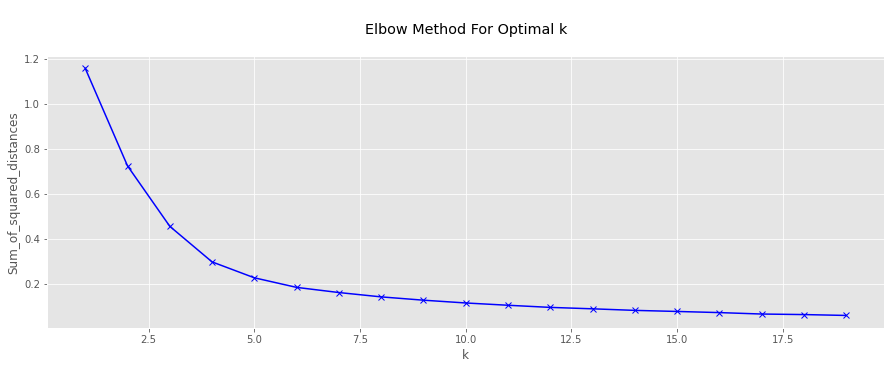

In [20]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('\nElbow Method For Optimal k\n')
plt.show()

## 3. Explain what KMeans inertia is and how different it is from DBSCAN epsilon. ( 4pts )
---

Based on the scikit-learn documentation, the KMeans inertia is recognized as a benchmark to determine if a cluster is optimal or not. The established rule of thumb is that a lower inertia value translates to an objectively performant cluster given that the samples are separated in n groups of equal variance. In essence, the inertia value is the sum of squared distances of all data points within a cluster, also known as intracluster distance. However, it also poses certain issues. One prominent disadvantage is that it assumes that clusters are convex and isotropic, which causes it to perform poorly when clusters vary in size and density. 

On the other hand, DBSCAN's epsilon value is a measure of distance used to locate nearby data points. According to hdbscan documentation, it enables the algorithmn to survey the domain or radius of every data point to check its density in terms of points. This enables the algorithm to disregard outliers that are outside the radius of a data point, dictated by its epsilon value. Both algorithms are fundamentally different in that KMeans is a distance-based clustering algorithm whereas DBSCAN is a density-based algorithm.

### References: 
- https://scikit-learn.org/stable/modules/clustering.html
- https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
- https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages
- https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html

## 4. Cluster the locations data with DBSCAN. ( 5pts )
---

In [21]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.005, min_samples=5).fit(X)
y_dbscan = dbscan.labels_
y_dbscan

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0,  1, -1,  1,  2,  0, -1, -1, -1,
       -1,  0, -1, -1,  0, -1,  7, -1,  0, -1, -1,  7, -1,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0, -1,  0,  0,  2,  0,  0,  0,  2, -1, -1, -1,
        0,  0, -1, -1,  3, -1,  4,  5, -1, -1, -1, -1, -1,  0,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  9,  9, -1, -1, -1,  4, -1,  6, -1, -1, -1,
        7, -1, -1, -1, -1,  7, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  3,  9, -1,  8, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  8, -1, -1, -1, -1,  0, -1, -1,  3, -1,
       -1,  5,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  1,  6,  6,
        6, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3,  5,  5,  5,  5, -1,  0,
       -1, -1, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0,  9,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
        0, -1,  0, -1, -1

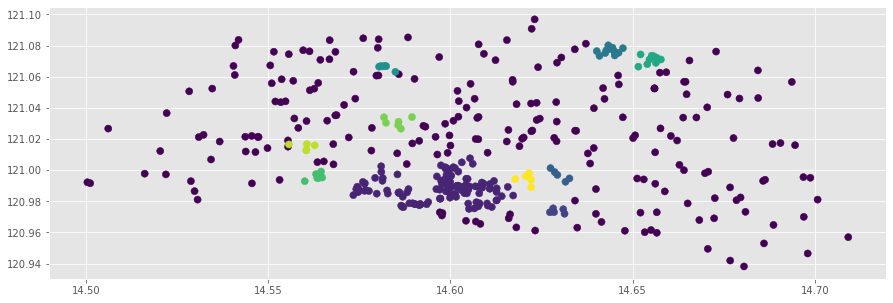

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')

In [23]:
df["dbscan_cluster"] = y_dbscan
palette = sns.color_palette("colorblind", len(y_dbscan)).as_hex()
color_getter = lambda x: palette[int(x)]
df["db_color"] = df["dbscan_cluster"].map(color_getter)
df.head()

,id,category,name,lat,lng,cluster,color,dbscan_cluster,db_color
0,51904869498e4ddbd9b476e8,elementary school,antonio regidor elementary school,14.604871,120.978577,0,#0173b2,0,#0173b2
1,4f3a0139e4b0b5606e162aca,elementary school,a. mabini elementary school,14.601315,120.984946,0,#0173b2,0,#0173b2
2,4d5db6b61d69b1f7bbea1ed1,elementary school,gregorio del pilar elementary school,14.606561,120.975451,0,#0173b2,0,#0173b2
3,4f21d06ce4b047657702f451,elementary school,general maximino hizon elementary school,14.611348,120.976359,0,#0173b2,0,#0173b2
4,4f6be8dae4b0541c5ffae3c2,elementary school,justo lukban elementary school,14.581349,120.993197,0,#0173b2,0,#0173b2


In [24]:
df = df[df["dbscan_cluster"] > -1]

In [25]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker(
        [row["lat"], row["lng"]], radius=5,
        fill = True,
        color = row["db_color"],
#         popup = folium.Popup(str(row["lat"]) + " " + str(row["lng"]), parse_html=True),
        popup = folium.Popup(row["name"] + ' | cluster:' + str(row["cluster"]) + ' | ' + str(row["lat"]) + " " + str(row["lng"]), parse_html=True),
        fill_color=row["db_color"]
   ).add_to(basemap)
    
# basemap.save('fast_food_db.html')

basemap

## 5. Present an analysis of the data following the DBSCAN results. ( 7pts )
### - explain what the clusters mean
### - what does the # of clusters tell us
### - what is this information useful for

---

The clusters denote the different schools that are grouped together based on the specified criteria (i.e. the epsilon and min_samples values.) The number of clusters are the number of schools that belong to different groups. 

This information could be useful for better urban planning and development, specifically in identifying transportation patterns by visualizing the density of schools per cluster. Furthermore, this information could also be integrated into planning other infrastructure development. 